In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#  comfigure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## importing face mask dataset

In [5]:
#  API to fetch the dataset from kaggle
!kaggle datasets download -domkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing The Dependencies

In [17]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1656.jpg', 'with_mask_1326.jpg', 'with_mask_3196.jpg', 'with_mask_2094.jpg', 'with_mask_2080.jpg']
['with_mask_2802.jpg', 'with_mask_3467.jpg', 'with_mask_1963.jpg', 'with_mask_2362.jpg', 'with_mask_1845.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2510.jpg', 'without_mask_554.jpg', 'without_mask_1282.jpg', 'without_mask_3027.jpg', 'without_mask_725.jpg']
['without_mask_3321.jpg', 'without_mask_578.jpg', 'without_mask_3236.jpg', 'without_mask_1837.jpg', 'without_mask_48.jpg']


In [10]:
print("Number of mask images :", len(with_mask_files))
print("Number of with out mask images :", len(without_mask_files))

Number of mask images : 3725
Number of with out mask images : 3828


## **Creating Labels for the 2 classes of images**

With mask -> 1
without mask -> 0

In [11]:
#  creating the labels

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# **Displaying The Images**

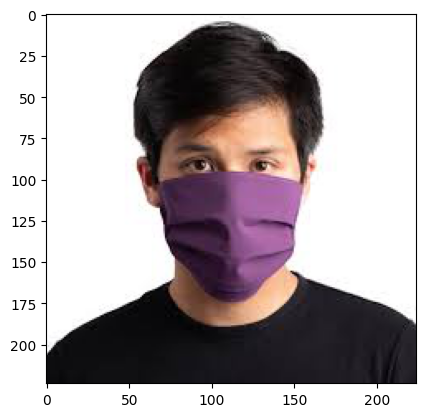

In [15]:
img = mpimg.imread('/content/data/with_mask/with_mask_2710.jpg')
imgplot = plt.imshow(img)
plt.show()

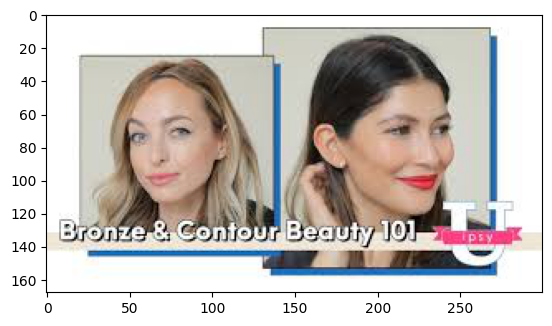

In [ ]:
# displaying without mask images
img = mpimg.imread('/content/data/without_mask/without_mask_3036.jpg')
imgplot = plt.imshow(img)
plt.show()

# Image Processing


## 
1.   Resize the images
2.   Convert the images to numpy arrays



In [20]:
#  convert images to numpy arrays
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

In [21]:

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

In [22]:
type(data)

list

In [23]:
len(data)

7553

In [25]:
data[0]

array([[[237, 232, 229],
        [238, 233, 230],
        [239, 234, 231],
        ...,
        [226, 225, 223],
        [224, 223, 221],
        [223, 222, 220]],

       [[237, 232, 229],
        [238, 233, 230],
        [239, 234, 231],
        ...,
        [226, 225, 223],
        [224, 223, 221],
        [223, 222, 220]],

       [[237, 232, 229],
        [238, 233, 230],
        [239, 234, 231],
        ...,
        [226, 225, 223],
        [224, 223, 221],
        [223, 222, 220]],

       ...,

       [[230, 223, 215],
        [231, 231, 221],
        [233, 235, 227],
        ...,
        [212, 213, 205],
        [210, 211, 203],
        [209, 210, 202]],

       [[236, 227, 220],
        [236, 235, 226],
        [234, 237, 228],
        ...,
        [211, 212, 204],
        [209, 210, 202],
        [207, 208, 200]],

       [[239, 227, 221],
        [235, 233, 224],
        [229, 232, 223],
        ...,
        [210, 211, 203],
        [207, 208, 200],
        [205, 206, 198]]

In [26]:
type(data[0])

numpy.ndarray

In [27]:
data[0].shape

(128, 128, 3)

In [28]:
# converting image list and label list to numpy arrays

x = np.array(data)
y = np.array(labels)

In [29]:
type(x)

numpy.ndarray

In [30]:
type(y)

numpy.ndarray

In [31]:
print(x.shape, y.shape, sep='   ')

(7553, 128, 128, 3)   (7553,)


In [32]:
print(y)

[1 1 1 ... 0 0 0]


## **Train, Test, Split**

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [35]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5664, 128, 128, 3) (1889, 128, 128, 3) (5664,) (1889,)


In [47]:
# scaling th data
x_train_scaled = x_train/255
y_train_scaled = y_train/255
x_test_scaled = x_test/255
y_test_scaled = y_test/255

In [37]:
x_train[0]

array([[[221, 217, 205],
        [221, 217, 205],
        [221, 217, 205],
        ...,
        [221, 217, 205],
        [221, 217, 205],
        [221, 217, 205]],

       [[221, 217, 205],
        [221, 217, 205],
        [221, 217, 205],
        ...,
        [221, 217, 205],
        [221, 217, 205],
        [221, 217, 205]],

       [[221, 217, 205],
        [221, 217, 205],
        [221, 217, 205],
        ...,
        [221, 217, 205],
        [221, 217, 205],
        [221, 217, 205]],

       ...,

       [[221, 217, 205],
        [221, 217, 205],
        [221, 217, 205],
        ...,
        [221, 217, 205],
        [221, 217, 205],
        [221, 217, 205]],

       [[221, 217, 205],
        [221, 217, 205],
        [221, 217, 205],
        ...,
        [221, 217, 205],
        [221, 217, 205],
        [221, 217, 205]],

       [[221, 217, 205],
        [221, 217, 205],
        [221, 217, 205],
        ...,
        [221, 217, 205],
        [221, 217, 205],
        [221, 217, 205]]

In [38]:
x_train_scaled[0]

array([[[0.86666667, 0.85098039, 0.80392157],
        [0.86666667, 0.85098039, 0.80392157],
        [0.86666667, 0.85098039, 0.80392157],
        ...,
        [0.86666667, 0.85098039, 0.80392157],
        [0.86666667, 0.85098039, 0.80392157],
        [0.86666667, 0.85098039, 0.80392157]],

       [[0.86666667, 0.85098039, 0.80392157],
        [0.86666667, 0.85098039, 0.80392157],
        [0.86666667, 0.85098039, 0.80392157],
        ...,
        [0.86666667, 0.85098039, 0.80392157],
        [0.86666667, 0.85098039, 0.80392157],
        [0.86666667, 0.85098039, 0.80392157]],

       [[0.86666667, 0.85098039, 0.80392157],
        [0.86666667, 0.85098039, 0.80392157],
        [0.86666667, 0.85098039, 0.80392157],
        ...,
        [0.86666667, 0.85098039, 0.80392157],
        [0.86666667, 0.85098039, 0.80392157],
        [0.86666667, 0.85098039, 0.80392157]],

       ...,

       [[0.86666667, 0.85098039, 0.80392157],
        [0.86666667, 0.85098039, 0.80392157],
        [0.86666667, 0

## **Building a Convolutional Neural Network**

In [39]:
import tensorflow as tf
from tensorflow import keras

In [42]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [43]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [44]:
# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
160/160 [==============================] - 17s 22ms/step - loss: 0.5291 - acc: 0.7689 - val_loss: 0.2805 - val_acc: 0.8854
Epoch 2/5
160/160 [==============================] - 3s 17ms/step - loss: 0.3165 - acc: 0.8731 - val_loss: 0.2441 - val_acc: 0.8907
Epoch 3/5
160/160 [==============================] - 3s 17ms/step - loss: 0.2567 - acc: 0.8944 - val_loss: 0.2250 - val_acc: 0.9083
Epoch 4/5
160/160 [==============================] - 3s 18ms/step - loss: 0.2220 - acc: 0.9127 - val_loss: 0.2922 - val_acc: 0.8818
Epoch 5/5
160/160 [==============================] - 3s 17ms/step - loss: 0.1870 - acc: 0.9262 - val_loss: 0.2913 - val_acc: 0.8854


## **Model Evaluation**

In [48]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print("Test Accuracy =", accuracy)

60/60 [==============================] - 1s 15ms/step - loss: 0.2571 - acc: 0.8931
Test Accuracy = 0.8930650949478149


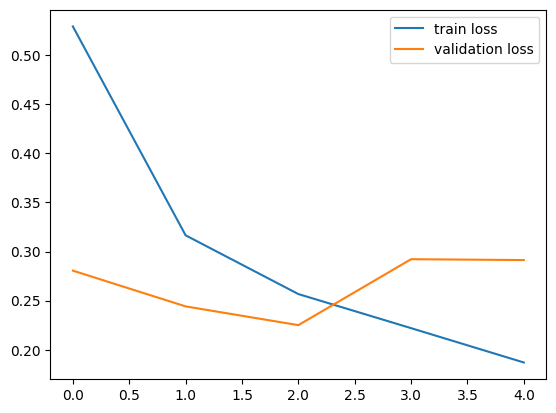

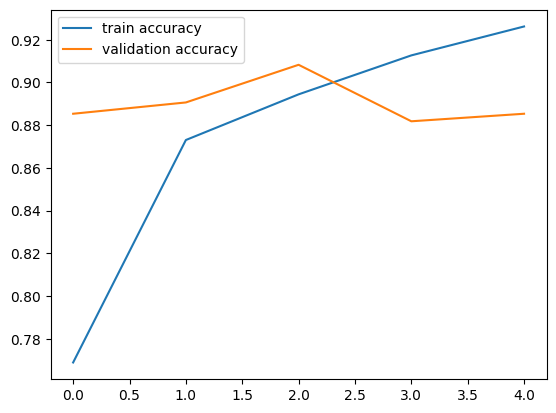

In [49]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()


# **Predictory System**

Path of the image to be predicted: /content/data/with_mask/with_mask_2710.jpg


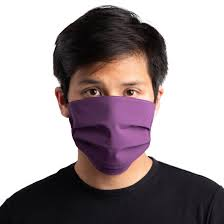

1/1 [==============================] - 0s 20ms/step
1
The person in the image is wearing a mask


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print("The person in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")